## Kmeans From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeansClustering():
    def __init__(self,k=3):
        self.k=k
        self.centroids= None
    
    @staticmethod
    def Euclidean(x1, x2):
        return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2,axis=1))
    @staticmethod
    def Manhattan(x, y):
        return np.sum(np.abs(np.array(x) - np.array(y)),axis=1)

    
    
    def fit(self, X, max_iterations=500):
        self.centroids=np.random.uniform(np.amin(X,axis=0)   ,np.amax(X,axis=0),size=(self.k,X.shape[1]))
       
        
       
        for _ in range(max_iterations):
            y=[]
            
            for data_point in X:
                distances=KMeansClustering.Euclidean(data_point,self.centroids)
                cluster_index=np.argmin(distances)
                y.append(cluster_index)
            y=np.array(y)
            
            cluster_indices=[]
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere( y==i ))
            
            cluster_centers=[]
            
            for i,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[i])
                    
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])
                    
            if np.max(self.centroids-np.array(cluster_centers))<10e-15:
                break
            else:
                self.centroids=np.array(cluster_centers)
        return y

In [16]:
random_points=np.random.randint(0,100,(100,2))

kmeans= KMeansClustering(k=3)
labels=kmeans.fit(random_points)

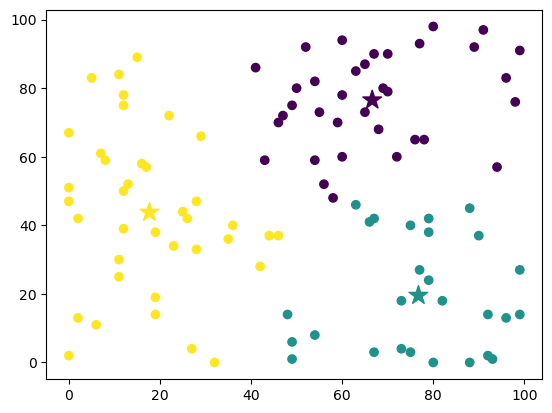

In [17]:
plt.scatter(random_points[:,0],random_points[:,1],c=labels)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],c=range(len(kmeans.centroids)),marker='*',s=200)
plt.show()